In [38]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Isha\Desktop\Data analyst project\Sales DB\Cleaned Data.csv")
print(f"All Columns:-\n\n",df.head(0)) 
print(f"\nData Discription:-\n", df.describe())
print(f"\n Data Type\n\n",df.dtypes)

All Columns:-

 Empty DataFrame
Columns: [Date, Customer_Age, Age_Group, Customer_Gender, Country, State, Product_Category, Sub_Category, Product, Order_Quantity, Unit_Cost, Unit_Price, Profit, Cost, Revenue, Profit_Margin]
Index: []

Data Discription:-
         Customer_Age  Order_Quantity      Unit_Cost     Unit_Price  \
count  113036.000000   113036.000000  113036.000000  113036.000000   
mean       35.919212       11.901660     267.296366     452.938427   
std        11.021936        9.561857     549.835483     922.071219   
min        17.000000        1.000000       1.000000       2.000000   
25%        28.000000        2.000000       2.000000       5.000000   
50%        35.000000       10.000000       9.000000      24.000000   
75%        43.000000       20.000000      42.000000      70.000000   
max        87.000000       32.000000    2171.000000    3578.000000   

              Profit           Cost        Revenue  
count  113036.000000  113036.000000  113036.000000  
mean    

# Data Cleaning

In [20]:
df.isnull().sum()

Date                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
Profit_Margin       0
dtype: int64

In [40]:
df['Profit_Margin'] = df['Profit_Margin'].replace('%', '', regex=True).astype(float) / 100
df['Date'] = pd.to_datetime(df['Date'])
df['Year-Month'] = df['Date'].dt.to_period('M')
print(f"All Columns:-\n\n",df.head(2)) 
print(f"\n Data Type\n\n",df.dtypes)

All Columns:-

         Date  Customer_Age    Age_Group Customer_Gender Country  \
0 2013-11-26            19  Youth (<25)               M  Canada   
1 2015-11-26            19  Youth (<25)               M  Canada   

              State Product_Category Sub_Category              Product  \
0  British Columbia      Accessories   Bike Racks  Hitch Rack - 4-Bike   
1  British Columbia      Accessories   Bike Racks  Hitch Rack - 4-Bike   

   Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  Revenue  \
0               8         45         120     590   360      950   
1               8         45         120     590   360      950   

   Profit_Margin Year-Month  
0           0.62    2013-11  
1           0.62    2015-11  

 Data Type

 Date                datetime64[ns]
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Cate

# Analysis

In [50]:
total_revenue = df['Revenue'].sum()
age_group_revenue = df.groupby('Age_Group')['Revenue'].sum().reset_index()
age_group_revenue['Revenue Percentage'] = (age_group_revenue['Revenue'] / total_revenue) * 100
print(age_group_revenue)




              Age_Group   Revenue  Revenue Percentage
0        Adults (35-64)  42584153           49.939779
1         Seniors (64+)    308042            0.361251
2  Young Adults (25-34)  30655614           35.950805
3           Youth (<25)  11723199           13.748165


In [52]:
total_profit = df['Profit'].sum()
profit_by_category = df.groupby('Product_Category')['Profit'].sum().reset_index()
profit_by_category['Profit Percentage'] = (profit_by_category['Profit'] / total_profit) * 100
print(profit_by_category)

  Product_Category    Profit  Profit Percentage
0      Accessories   8862377          27.504887
1            Bikes  20519276          63.682730
2         Clothing   2839447           8.812384


# Visualization 

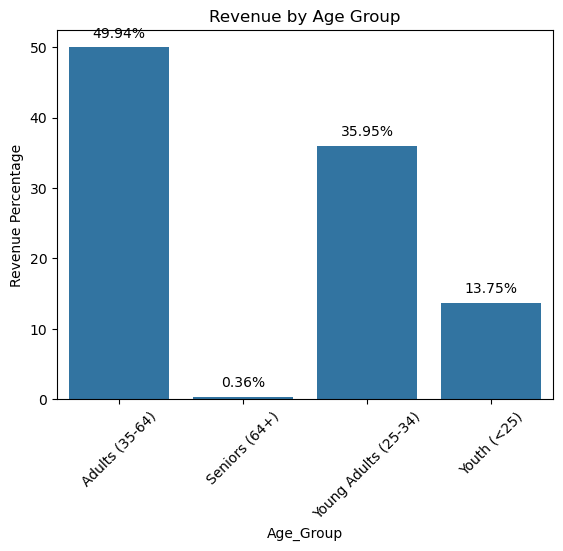

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Age_Group', y='Revenue Percentage', data=age_group_revenue)
plt.title('Revenue by Age Group')
for i, value in enumerate(age_group_revenue['Revenue Percentage']):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.show()

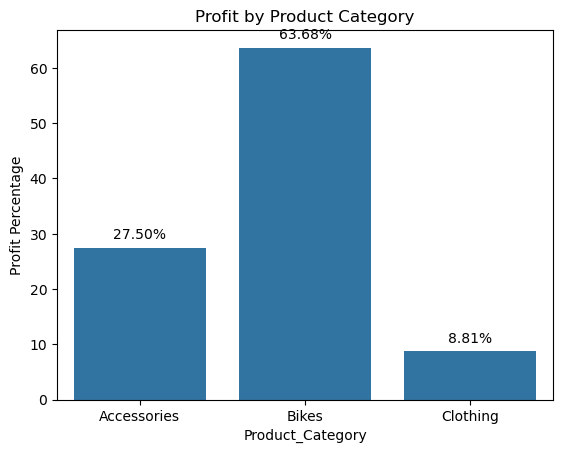

In [79]:
sns.barplot(x='Product_Category', y='Profit Percentage', data=profit_by_category)
for i, value in enumerate(profit_by_category['Profit Percentage']):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', va='bottom', fontsize=10)
plt.title('Profit by Product Category')
plt.show()

# Conclusion

In [83]:
# As per the analysys

# Most high Revenue is from Adults(35-64) are the 49% , and remaining are:
# Young Adults (25-34) 35% , Youth (<25) 13% and from Seniors (64+) its 0% 


# Most Profi is from the Bike Category 63% and remaing category profit % is :
# Accessories are 27% and Clothing is 8%  

#Further Analysis will be dooing in Power BI tool 